### PEW Automation Data Workbook

#### 1. Data Import and EDA

In [1]:
# standard import 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset
try:
    pew_raw = pd.read_csv('pew_automation.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please ensure 'pew_automation.csv' is in the current directory.")
    exit()

# Convert to dataframe
pew_auto = pd.DataFrame(pew_raw)

Dataset loaded successfully.


In [3]:
# Describe the dataset 
pew_auto.info()
pew_auto.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4135 entries, 0 to 4134
Columns: 251 entries, QKEY to WEIGHT_W27
dtypes: float64(251)
memory usage: 7.9 MB


,QKEY,NEW_Device_Type_W27,LANGUAGE_W27,FORM_W27,CAREREL_W27,INDUSTRY_W27,JOBDUTY_A_W27,JOBDUTY_B_W27,JOBDUTY_C_W27,JOBDUTY_D_W27,...,WORKCAT_62,WORKCAT_63,WORKCAT_64,WORKCAT_65,WORKCAT_66,WORKCAT_67,WORKCAT_68,WORKCAT_23,WORKCAT_99,WEIGHT_W27
count,4.135000e+03,4135.000000,4135.000000,4135.000000,4135.000000,2629.000000,2510.000000,2510.000000,2510.000000,2510.000000,...,138.0,175.0,27.0,52.0,186.0,62.0,33.0,30.0,425.000000,4135.000000
mean,7.470448e+10,2.039661,9.010399,1.505441,2.560339,6.384176,0.302789,0.445020,0.679283,0.431076,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,98.221176,1.000000
std,9.733725e+10,0.944453,0.101456,0.500031,5.160292,3.601432,0.459556,0.497067,0.466845,0.495325,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.950682,1.381609
min,1.001970e+05,1.000000,9.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,97.000000,0.087911
25%,3.153135e+05,1.000000,9.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,97.000000,0.232140
50%,6.774790e+05,2.000000,9.000000,2.000000,2.000000,6.000000,0.000000,0.000000,1.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,99.000000,0.470111
75%,2.015014e+11,3.000000,9.000000,2.000000,3.000000,10.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,99.000000,1.116633
max,2.015018e+11,3.000000,10.000000,2.000000,99.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,99.000000,7.423416


In [4]:
# Replaces all known placeholders with NaN
pew_auto.replace({99: np.nan, 98: np.nan, -1: np.nan}, inplace=True)

# Create binary Target from ROBJOB3B_W27 (How worried are you about automation) 
pew_auto['Target'] = pew_auto['ROBJOB3B_W27'].replace({1: 1, 2: 1, 3: 0, 4: 0})
pew_auto.head(5)

,QKEY,NEW_Device_Type_W27,LANGUAGE_W27,FORM_W27,CAREREL_W27,INDUSTRY_W27,JOBDUTY_A_W27,JOBDUTY_B_W27,JOBDUTY_C_W27,JOBDUTY_D_W27,...,WORKCAT_63,WORKCAT_64,WORKCAT_65,WORKCAT_66,WORKCAT_67,WORKCAT_68,WORKCAT_23,WORKCAT_99,WEIGHT_W27,Target
0,100197.0,2.0,9.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.175440,1.0
1,100260.0,2.0,9.0,2.0,3.0,7.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.414386,0.0
2,100314.0,3.0,9.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.429735,0.0
3,100363.0,1.0,9.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.814315,1.0
4,100446.0,3.0,9.0,1.0,1.0,5.0,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.162845,1.0


Text(0.5, 0, 'Worry About Automation (1 = Worried, 0 = Not Worried)')

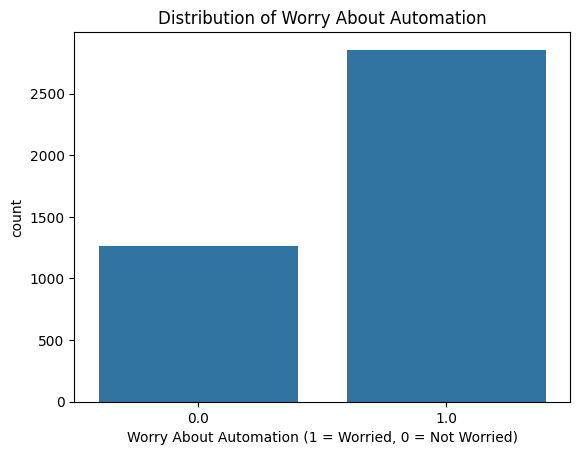

In [5]:
# Plot the distribution of worry about automation
sns.countplot(x='Target', data=pew_auto)
plt.title('Distribution of Worry About Automation')
plt.xlabel('Worry About Automation (1 = Worried, 0 = Not Worried)')

Text(0.5, 1.0, 'Worry by Industry')

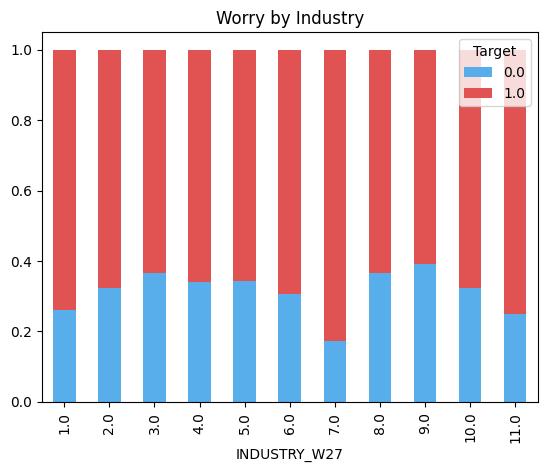

In [6]:
# Plot the distribution of worry about automation by industry
pd.crosstab(pew_auto["INDUSTRY_W27"], pew_auto["Target"], normalize="index").plot(kind="bar", stacked=True, color=["#58aeeb", "#E15353"])
plt.title("Worry by Industry")

Text(0.5, 1.0, 'Proportion Worried Development of Driverless Cars')

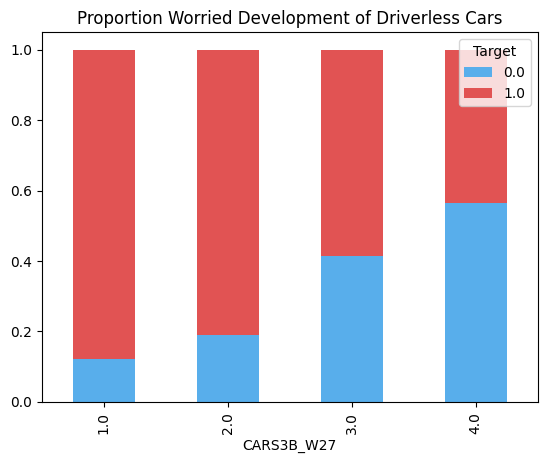

In [7]:
# Plot the distribution of worry development of driverless cars by the worry about automation
pd.crosstab(pew_auto["CARS3B_W27"], 
            pew_auto["Target"], 
            normalize="index"
            ).plot(kind="bar", 
                   stacked=True, 
                   color=["#58aeeb", "#E15353"])
plt.title("Proportion Worried Development of Driverless Cars")

In [8]:
# Selected 81 features + Target from dataset of 250+ features for analysis 
selected_columns = [
    "Target","INDUSTRY_W27", "JOBDUTY_A_W27", "JOBDUTY_B_W27", "JOBDUTY_C_W27", "JOBDUTY_D_W27", "JOBDUTY_E_W27",
    "KNOW1_W27", "KNOW2_W27", "PREDICTA_W27", "PREDICTB_W27", "PREDICTC_W27", "PREDICTD_W27",
    "CARS1_W27", "CARS2_W27", "CARS3A_W27", "CARS3B_W27", "CARS4_W27", "CARS5_W27",
    "CARS7A_W27", "CARS7B_W27", "CARS8_W27", "CARS9A_W27", "CARS9B_W27", "CARS9C_W27",
    "CARS10A_W27", "CARS10B_W27", "CARS10C_W27", "CARS10D_W27", "CARS10E_W27",
    "WORK2_W27", "WORK3A_W27", "WORK3B_W27", "WORK3C_W27", "WORK3D_W27", "WORK3E_W27", "WORK3F_W27",
    "WORK4A_W27", "WORK4B_W27", "WORK4C_W27", "ROBJOB1_W27", "ROBJOB2_W27",
    "ROBJOB4A_W27", "ROBJOB4B_W27", "ROBJOB4C_W27", "ROBJOB4D_W27", "ROBJOB4E_W27", "ROBJOB4F_W27",
    "ROBJOB5A_W27", "ROBJOB5B_W27", "ROBJOB5C_W27", "ROBJOB5D_W27", "ROBJOB6_W27", "ROBJOB7_W27",
    "ROBJOB8A_W27", "ROBJOB8B_W27", "ROBJOB8C_W27", "ROBJOB8D_W27", "ROBJOB8E_W27", "ROBJOB8F_W27", "ROBJOB8G_W27",
    "ROBJOB9_W27", "WORK5A_W27", "WORK5B_W27", "WORK6_W27", "WORK7_W27", "F_CREGION_FINAL", "F_AGECAT_FINAL", "F_SEX_FINAL",
    "F_EDUCCAT_FINAL", "F_EDUCCAT2_FINAL", "F_RACECMB_RECRUITMENT", "F_MARITAL_FINAL", "F_RELIG_FINAL",
    "F_PARTY_FINAL", "F_PARTYLN_FINAL", "F_INCOME_RECODE_FINAL", "F_INSURANCE_FINAL", "F_INT_FREQ1_FINAL", "F_INT_FREQCOMB_FINAL",
    "F_SNSUSER_FINAL", "F_BBINT_RF1"
]

# Filter the DataFrame to include only the selected columns
pew_auto_filtered = pew_auto.copy()
pew_auto_filtered = pew_auto_filtered[selected_columns]
pew_auto_filtered.head(5)


,Target,INDUSTRY_W27,JOBDUTY_A_W27,JOBDUTY_B_W27,JOBDUTY_C_W27,JOBDUTY_D_W27,JOBDUTY_E_W27,KNOW1_W27,KNOW2_W27,PREDICTA_W27,...,F_MARITAL_FINAL,F_RELIG_FINAL,F_PARTY_FINAL,F_PARTYLN_FINAL,F_INCOME_RECODE_FINAL,F_INSURANCE_FINAL,F_INT_FREQ1_FINAL,F_INT_FREQCOMB_FINAL,F_SNSUSER_FINAL,F_BBINT_RF1
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,...,3.0,2.0,2.0,NaN,3.0,1.0,1.0,3.0,1.0,1.0
1,0.0,7.0,1.0,0.0,1.0,0.0,0.0,2.0,3.0,2.0,...,6.0,13.0,4.0,1.0,2.0,1.0,1.0,4.0,1.0,1.0
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,...,2.0,1.0,1.0,NaN,2.0,1.0,1.0,2.0,1.0,3.0
3,1.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,3.0,...,1.0,2.0,2.0,NaN,1.0,1.0,1.0,3.0,1.0,1.0
4,1.0,5.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,...,6.0,11.0,2.0,NaN,1.0,1.0,1.0,2.0,1.0,1.0


In [9]:
# Check % of missing values in the filtered DataFrame
pd.set_option('display.max_rows', None)
pew_auto_filtered.isnull().mean().sort_values(ascending=False).head(80)

WORK5B_W27               0.979927
F_PARTYLN_FINAL          0.640629
WORK3D_W27               0.395889
WORK3F_W27               0.395889
WORK3C_W27               0.395647
WORK3A_W27               0.395405
WORK3B_W27               0.395163
WORK4B_W27               0.394921
WORK3E_W27               0.394680
WORK4A_W27               0.393954
WORK4C_W27               0.393712
ROBJOB9_W27              0.393470
JOBDUTY_C_W27            0.392987
JOBDUTY_A_W27            0.392987
JOBDUTY_E_W27            0.392987
JOBDUTY_D_W27            0.392987
JOBDUTY_B_W27            0.392987
INDUSTRY_W27             0.364450
CARS2_W27                0.044256
F_INCOME_RECODE_FINAL    0.017412
ROBJOB5D_W27             0.015236
F_BBINT_RF1              0.013301
ROBJOB6_W27              0.013059
F_INT_FREQCOMB_FINAL     0.011366
ROBJOB7_W27              0.010399
ROBJOB4D_W27             0.009674
ROBJOB4E_W27             0.009432
ROBJOB5A_W27             0.008948
ROBJOB5C_W27             0.008706
ROBJOB4C_W27  

In [10]:
# Based on the missing values drop columns with high missing rates (> 50%)
pew_auto_filtered = pew_auto_filtered.drop(columns=["WORK5B_W27", "F_PARTYLN_FINAL"])

# Drop rows with NaN 
pew_auto_filtered.dropna(inplace=True)

# Check size of remaining DataFrame
pew_auto_filtered.shape

(2102, 80)

#### Feature Selection

In [11]:
# Feature selection using chi-squared test
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

# Separate features and target
X = pew_auto_filtered.drop(columns=['Target'])
y = pew_auto_filtered['Target']

# Apply chi-squared test
selector = SelectKBest(score_func=chi2, k='all')  # 'all' gets scores for all features
selector.fit(X, y)

# Create a DataFrame of feature scores
chi2_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2_Score': selector.scores_
})

# Sort by score (descending)
chi2_scores_sorted = chi2_scores.sort_values(by='Chi2_Score', ascending=False)

# Display top N (e.g., top 20)
print(chi2_scores_sorted.head(80))

                  Feature  Chi2_Score
15             CARS3B_W27   47.337141
42           ROBJOB4B_W27   34.866450
19             CARS7B_W27   21.841252
41           ROBJOB4A_W27   21.490149
18             CARS7A_W27   20.696358
23             CARS9C_W27   17.140642
22             CARS9B_W27   15.999028
52            ROBJOB7_W27   15.246218
46           ROBJOB4F_W27   14.806774
45           ROBJOB4E_W27   14.403908
50           ROBJOB5D_W27   13.334925
60            ROBJOB9_W27   12.937594
53           ROBJOB8A_W27   11.261134
21             CARS9A_W27   10.551028
59           ROBJOB8G_W27   10.476030
14             CARS3A_W27   10.228959
48           ROBJOB5B_W27    9.848518
58           ROBJOB8F_W27    8.384292
33             WORK3D_W27    7.938003
76   F_INT_FREQCOMB_FINAL    7.399648
44           ROBJOB4D_W27    6.908346
47           ROBJOB5A_W27    6.837855
17              CARS5_W27    6.608165
25            CARS10B_W27    6.520834
54           ROBJOB8B_W27    5.641370
2           

In [12]:
# Feature selection using chi-squared test
from sklearn.feature_selection import SelectKBest, chi2

# Apply chi-squared test
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit(X, y)

# Get the selected feature names
selected_features_cols = X_new.get_support()
selected_features = X.iloc[:, selected_features_cols].columns.tolist()
print(selected_features)

['CARS3B_W27', 'CARS7A_W27', 'CARS7B_W27', 'ROBJOB4A_W27', 'ROBJOB4B_W27']


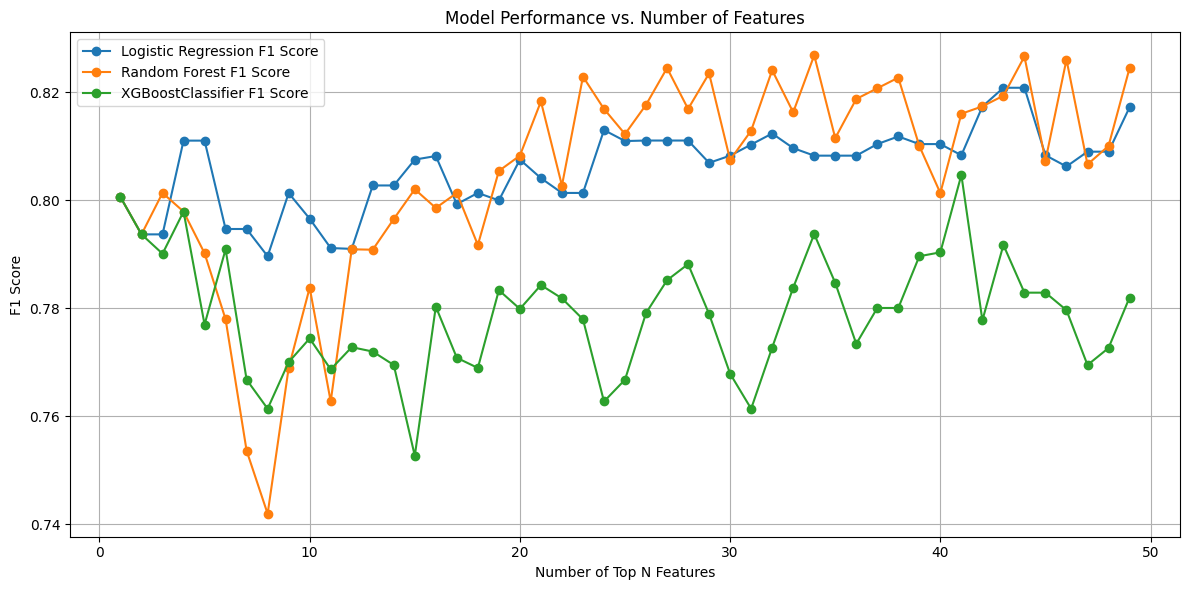

In [ ]:
# Chi2 Feature Importance Study 
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Rank features using Chi-Squared
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X, y)

chi2_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2_Score': selector.scores_
}).sort_values(by='Chi2_Score', ascending=False)

# Evaluate model performance across top N features
def evaluate_top_n_features(n):
    top_n_features = chi2_scores['Feature'].head(n).tolist()
    X_selected = X[top_n_features]

    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y, test_size=0.2, random_state=42, stratify=y)

    # Define models to evaluate
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42), 
        'XGBoostClassifier': XGBClassifier(eval_metric='logloss', random_state=42)
    }
    
    # Train and evaluate each model
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        results[name] = {
            'Accuracy': accuracy_score(y_test, preds),
            'F1': f1_score(y_test, preds)
        }
    return results

# Run evaluation for multiple values of N
results_summary = []
top_n_range = range(1, 50, 1) 

# Evaluate models for each top N feature count
for n in top_n_range:
    result = evaluate_top_n_features(n)
    for model_name in result:
        results_summary.append({
            'Top_N': n,
            'Model': model_name,
            'Accuracy': result[model_name]['Accuracy'],
            'F1': result[model_name]['F1']
        })

results_df = pd.DataFrame(results_summary)

# Plot results
plt.figure(figsize=(12, 6))
for model_name in results_df['Model'].unique():
    subset = results_df[results_df['Model'] == model_name]
    plt.plot(subset['Top_N'], subset['F1'], marker='o', label=f'{model_name} F1 Score')
plt.xlabel("Number of Top N Features")
plt.ylabel("F1 Score")
plt.title("Model Performance vs. Number of Features")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Users\aishw\Documents\MS Data Science\DTSC 691 - Capstone\Technology Adoption Predictor\techenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


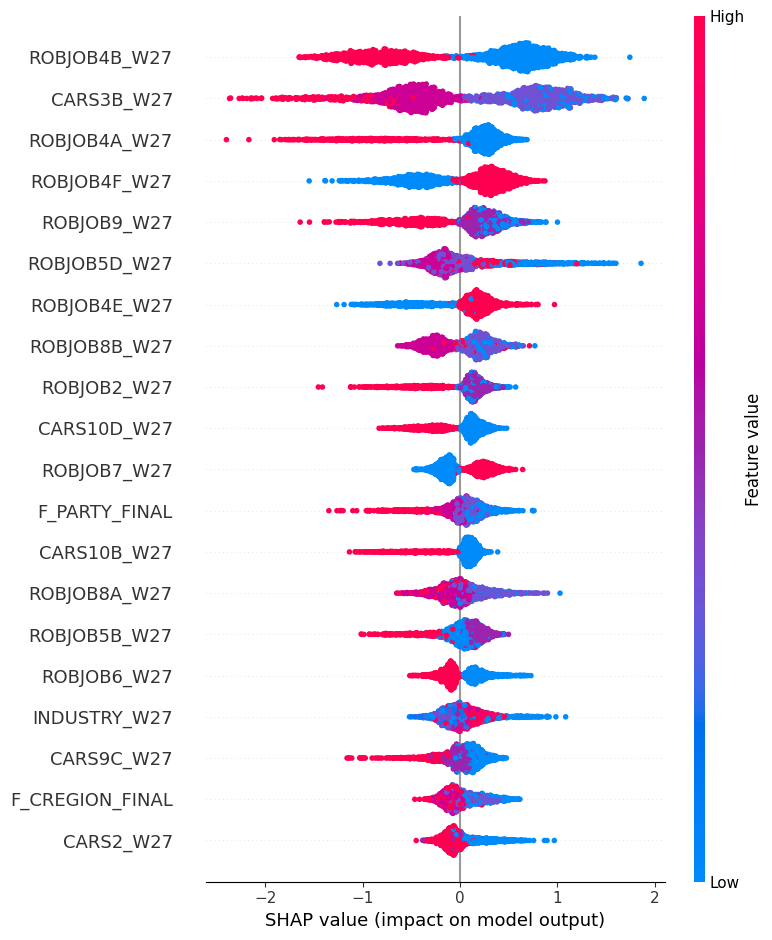

In [14]:
# Check feature explainability using SHAP for feature selection
import shap
import xgboost as xgb
from xgboost import XGBClassifier as XGBoostClassifier
rf = XGBoostClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

explainer = shap.Explainer(rf)
shap_values = explainer(X)

shap.summary_plot(shap_values, X)